In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
#Zaj9

# **Zadanie 1**

In [ ]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)
df

,Słowo_1,Słowo_2,Wykrzyknik,Spam
0,darmowy,wygrana,TAK,TAK
1,darmowy,wygrana,TAK,TAK
2,spotkanie,jutro,NIE,NIE
3,raport,kwartalny,NIE,NIE
4,oferta,specjalna,TAK,NIE
5,darmowy,rabat,TAK,TAK
6,spotkanie,dziś,NIE,NIE
7,oferta,limitowana,TAK,NIE
8,raport,miesięczny,NIE,NIE
9,darmowy,rabat,TAK,TAK


# **a)**

# **1. A Priori**
#**Spam**
#Tak: 4  -> P(Tak) = 4/12 = 1/3 = 0.333
#Nie: 8  -> P(Nie) = 8/12 = 2/3 = 0.666

# **2. Warunkowe**
#**Słowo_1**
#**darmowy:** 4 TAK 0 NIE ->
#TAK = 4/4 = 1
#NIE = 0/8 = 0
#**raport:** 2 NIE -> TAK = 0
#TAK = 0/4 = 0
#NIE = 2/8 = 0.25
#**oferta:** 3 NIE
#TAK = 0/4 = 0
#NIE = 3/8 = 0.375
#**spotkanie:** 3 NIE
#TAK = 0/4 = 0
#NIE = 3/8 = 0.375

#**Słowo_2**
#**wygrana** 2 TAK 0 NIE
#P(TAK) = 2/4 = 0.5
#P(NIE) = 0/4 = 0
#**kwartalny** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**jutro** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**specjalna** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**rabat** 2 TAK 0 NIE
#P(TAK) = 2/4 = 0.5
#P(NIE) = 0/4 = 0
#**dziś** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**limitowana** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**miesięczny** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**pilne** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125
#**wyjątkowa** 1 NIE 0 TAK
#P(TAK) = 0/4 = 0
#P(NIE) = 1/8 = 0.125

#**Wykrzyknik**
#**TAK** - 4 TAK 3 NIE
#P(TAK) = 4/4 = 1
#P(NIE) = 3/8 = 0.375
#**NIE** - 0 TAK 5 NIE
#P(TAK) = 0
#P(NIE) = 5/8 = 0.625


#**3 Przewidywanie Klasy**
#Słowo_1 = 'darmowy'
#Słowo_2 = 'wygrana'  
#Wykrzyknik = 'TAK'

#Predykcja dla tak:
#P(Słowo_1) = 1
#P(Słowo_2) = 0.5
#P(Wykrzyknik) = 1
#Wynik dla TAK = 0.333⋅1⋅0.5⋅1 = 0.1665

#Predykcja dla nie:
#P(Słowo_1) = 0
#P(Słowo_2) = 0
#P(Wykrzyknik) = 0.375
#Wynik dla NIE = 0.666⋅0⋅0⋅0.375 = 0




# **b)**

In [ ]:
#1
print("=" * 60)
class_counts = df['Spam'].value_counts()
total = len(df)
priors = class_counts / total

print(f"Liczba przypadków TAK: {class_counts['TAK']}")
print(f"Liczba przypadków NIE: {class_counts['NIE']}")
print(f"Razem: {total}")
print()
print(f"P(Gra = TAK) = {class_counts['TAK']}/{total} = {priors['TAK']:.3f}")
print(f"P(Gra = NIE) = {class_counts['NIE']}/{total} = {priors['NIE']:.3f}")
print()

Liczba przypadków TAK: 4
Liczba przypadków NIE: 8
Razem: 12

P(Gra = TAK) = 4/12 = 0.333
P(Gra = NIE) = 8/12 = 0.667



In [ ]:
print("=" * 60)

features = ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
conditionals = {}

for feature in features:
    print(f"\n{'='*60}")
    print(f"Cecha: {feature.upper()}")
    print(f"{'='*60}")
    conditionals[feature] = {}

    for class_val in ['TAK', 'NIE']:
        class_data = df[df['Spam'] == class_val]
        class_count = len(class_data)

        print(f"\nDla klasy {class_val} ({class_count} przypadków):")
        print("-" * 40)

        conditionals[feature][class_val] = {}
        feature_counts = class_data[feature].value_counts()

        for feature_val in df[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count if class_count > 0 else 0
            conditionals[feature][class_val][feature_val] = prob

            print(f"  {feature_val:12s}: {count} przypadków → "
                  f"P({feature}={feature_val} | {class_val}) = "
                  f"{count}/{class_count} = {prob:.3f}")


Cecha: SŁOWO_1

Dla klasy TAK (4 przypadków):
----------------------------------------
  darmowy     : 4 przypadków → P(Słowo_1=darmowy | TAK) = 4/4 = 1.000
  spotkanie   : 0 przypadków → P(Słowo_1=spotkanie | TAK) = 0/4 = 0.000
  raport      : 0 przypadków → P(Słowo_1=raport | TAK) = 0/4 = 0.000
  oferta      : 0 przypadków → P(Słowo_1=oferta | TAK) = 0/4 = 0.000

Dla klasy NIE (8 przypadków):
----------------------------------------
  darmowy     : 0 przypadków → P(Słowo_1=darmowy | NIE) = 0/8 = 0.000
  spotkanie   : 3 przypadków → P(Słowo_1=spotkanie | NIE) = 3/8 = 0.375
  raport      : 2 przypadków → P(Słowo_1=raport | NIE) = 2/8 = 0.250
  oferta      : 3 przypadków → P(Słowo_1=oferta | NIE) = 3/8 = 0.375

Cecha: SŁOWO_2

Dla klasy TAK (4 przypadków):
----------------------------------------
  wygrana     : 2 przypadków → P(Słowo_2=wygrana | TAK) = 2/4 = 0.500
  jutro       : 0 przypadków → P(Słowo_2=jutro | TAK) = 0/4 = 0.000
  kwartalny   : 0 przypadków → P(Słowo_2=kwartalny | T

In [ ]:
print("\n" + "=" * 60)
print("NORMALIZACJA I WYNIK KOŃCOWY")
print("=" * 60)

total_score = sum(scores.values())
print(f"\nSuma scores: {scores['TAK']:.6f} + {scores['NIE']:.6f} = {total_score:.6f}")
print()

normalized = {k: v/total_score for k, v in scores.items()}

print("Prawdopodobieństwa po normalizacji:")
for class_val in ['TAK', 'NIE']:
    percentage = normalized[class_val] * 100
    print(f"  P({class_val} | cechy) = {scores[class_val]:.6f} / {total_score:.6f} = "
          f"{normalized[class_val]:.3f} = {percentage:.1f}%")

print("\n" + "=" * 60)
prediction = max(normalized, key=normalized.get)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized[prediction]*100:.1f}%")
print("=" * 60)


NORMALIZACJA I WYNIK KOŃCOWY

Suma scores: 0.166667 + 0.000000 = 0.166667

Prawdopodobieństwa po normalizacji:
  P(TAK | cechy) = 0.166667 / 0.166667 = 1.000 = 100.0%
  P(NIE | cechy) = 0.000000 / 0.166667 = 0.000 = 0.0%

PREDYKCJA: TAK
Pewność: 100.0%


In [ ]:

new_record = {
    "Słowo_1": "darmowy",
    "Słowo_2": "wygrana",
    "Wykrzyknik": "TAK"
}

print(f"\nNowy rekord:")
for key, val in new_record.items():
    print(f"  {key}: {val}")
print()

scores = {}

for class_val in ['TAK', 'NIE']:
    print(f"\n{'='*60}")
    print(f"Obliczenia dla klasy: {class_val}")
    print(f"{'='*60}")

    score = priors[class_val]
    print(f"\n1. Prior: P({class_val}) = {score:.3f}")

    step = 2
    for feature, value in new_record.items():
        prob = conditionals[feature][class_val].get(value, 0)
        print(f"{step}. P({feature}={value} | {class_val}) = {prob:.3f}")
        score *= prob
        print(f"   Score po mnożeniu: {score:.6f}")
        step += 1

    print(f"\nWynik końcowy dla {class_val}: {score:.6f}")
    scores[class_val] = score



Nowy rekord:
  Słowo_1: darmowy
  Słowo_2: wygrana
  Wykrzyknik: TAK


Obliczenia dla klasy: TAK

1. Prior: P(TAK) = 0.333
2. P(Słowo_1=darmowy | TAK) = 1.000
   Score po mnożeniu: 0.333333
3. P(Słowo_2=wygrana | TAK) = 0.500
   Score po mnożeniu: 0.166667
4. P(Wykrzyknik=TAK | TAK) = 1.000
   Score po mnożeniu: 0.166667

Wynik końcowy dla TAK: 0.166667

Obliczenia dla klasy: NIE

1. Prior: P(NIE) = 0.667
2. P(Słowo_1=darmowy | NIE) = 0.000
   Score po mnożeniu: 0.000000
3. P(Słowo_2=wygrana | NIE) = 0.000
   Score po mnożeniu: 0.000000
4. P(Wykrzyknik=TAK | NIE) = 0.375
   Score po mnożeniu: 0.000000

Wynik końcowy dla NIE: 0.000000


# **Wyniki różnią się nieznacznie, co może poprostu wynikać z innego zaokraglenia**

# **c)**

In [ ]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}

df = pd.DataFrame(data_spam)

features = ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
le_dict = {}
X_encoded = df[features].copy()

for col in features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['Spam'])

model = CategoricalNB()
model.fit(X_encoded, y_encoded)

new_mail = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wyjątkowa',
    'Wykrzyknik': 'TAK'
}

new_encoded = []
for f in features:
    new_encoded.append(le_dict[f].transform([new_mail[f]])[0])

new_encoded = np.array([new_encoded])

prediction = model.predict(new_encoded)
probabilities = model.predict_proba(new_encoded)

print("="*60)
print("WERYFIKACJA ZE SKLEARN")
print("="*60)
print(f"Predykcja: {le_target.inverse_transform(prediction)[0]}")
print(f"Prawdopodobieństwa: Spam={probabilities[0][1]:.3f}, Nie-spam={probabilities[0][0]:.3f}")

WERYFIKACJA ZE SKLEARN
Predykcja: TAK
Prawdopodobieństwa: Spam=0.834, Nie-spam=0.166


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


# **ZADANIE 2**

# **a)**

In [ ]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df = pd.DataFrame(data)

df_T = df[df["Grypa"] == "TAK"]
df_N = df[df["Grypa"] == "NIE"]

print("Liczność klas:")
print(df["Grypa"].value_counts(), "\n")

features = ["Gorączka", "Kaszel", "Zmęczenie"]
conditionals = {}

for feature in features:
    print(f"\n=== {feature.upper()} ===")
    values = df[feature].unique()

    for v in values:
        p_t = (df_T[feature] == v).mean()
        p_n = (df_N[feature] == v).mean()
        print(f"{v:12s}: P({feature}={v}|TAK)={p_t:.3f},  P({feature}={v}|NIE)={p_n:.3f}")


Liczność klas:
Grypa
TAK    8
NIE    7
Name: count, dtype: int64 


=== GORĄCZKA ===
wysoka      : P(Gorączka=wysoka|TAK)=0.750,  P(Gorączka=wysoka|NIE)=0.143
niska       : P(Gorączka=niska|TAK)=0.000,  P(Gorączka=niska|NIE)=0.714
umiarkowana : P(Gorączka=umiarkowana|TAK)=0.250,  P(Gorączka=umiarkowana|NIE)=0.143

=== KASZEL ===
TAK         : P(Kaszel=TAK|TAK)=1.000,  P(Kaszel=TAK|NIE)=0.143
NIE         : P(Kaszel=NIE|TAK)=0.000,  P(Kaszel=NIE|NIE)=0.857

=== ZMĘCZENIE ===
duże        : P(Zmęczenie=duże|TAK)=0.875,  P(Zmęczenie=duże|NIE)=0.000
małe        : P(Zmęczenie=małe|TAK)=0.000,  P(Zmęczenie=małe|NIE)=0.857
umiarkowane : P(Zmęczenie=umiarkowane|TAK)=0.125,  P(Zmęczenie=umiarkowane|NIE)=0.143


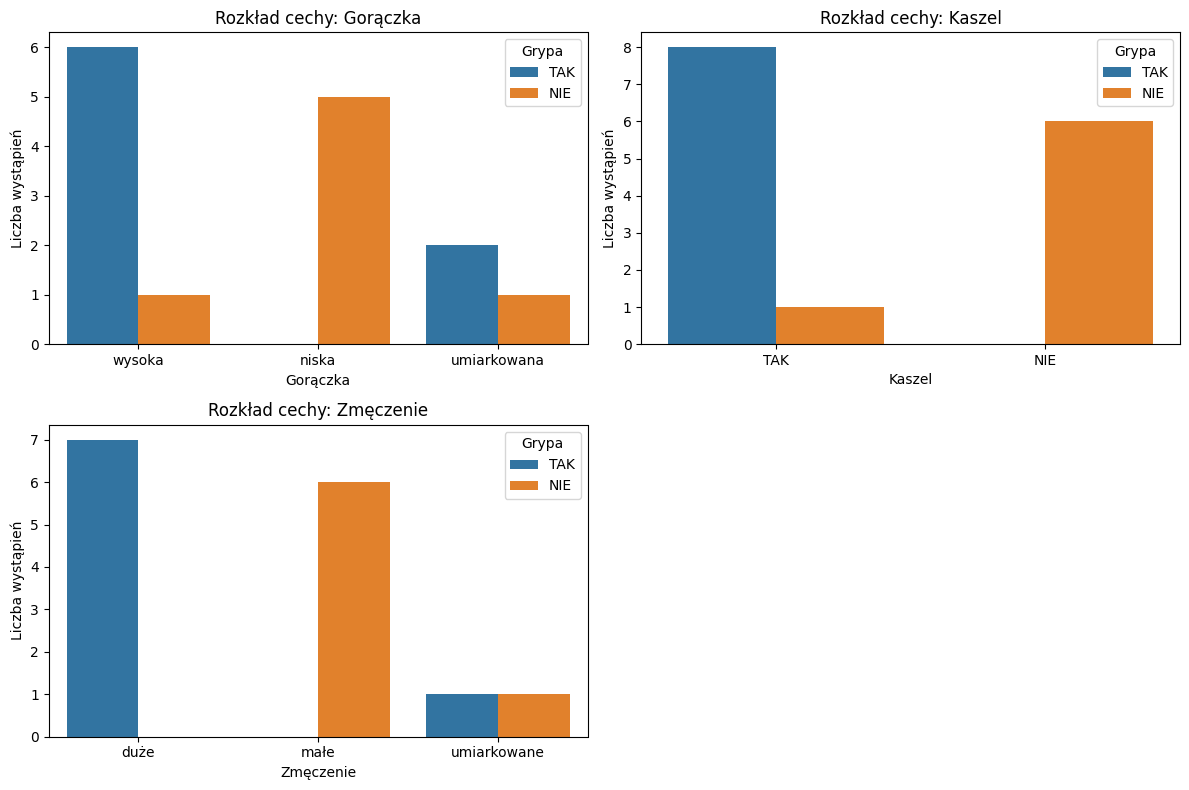

In [ ]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, hue="Grypa")
    plt.title(f"Rozkład cechy: {feature}")
    plt.ylabel("Liczba wystąpień")

plt.tight_layout()
plt.show()


# **b)**

In [ ]:

features = ["Gorączka", "Kaszel", "Zmęczenie"]

le_dict = {}
X_encoded = df[features].copy()
for col in features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['Grypa'])

# Trening modelu
model = CategoricalNB()
model.fit(X_encoded, y_encoded)

# Pacjenci
pacjenci = {
    "A": ("wysoka", "TAK", "duże"),
    "B": ("niska", "NIE", "małe"),
    "C": ("umiarkowana", "TAK", "umiarkowane")
}

# Predykcja
for name, values in pacjenci.items():
    new_encoded = []
    for f, val in zip(features, values):
        new_encoded.append(le_dict[f].transform([val])[0])
    new_encoded = np.array([new_encoded])

    prediction = model.predict(new_encoded)
    probabilities = model.predict_proba(new_encoded)

    print("\n" + "="*40)
    print(f"Pacjent {name}")
    print("="*40)
    print(f"Predykcja: {le_target.inverse_transform(prediction)[0]}")
    print(f"Prawdopodobieństwa: TAK={probabilities[0][1]:.3f}, NIE={probabilities[0][0]:.3f}")



Pacjent A
Predykcja: TAK
Prawdopodobieństwa: TAK=0.991, NIE=0.009

Pacjent B
Predykcja: NIE
Prawdopodobieństwa: TAK=0.003, NIE=0.997

Pacjent C
Predykcja: TAK
Prawdopodobieństwa: TAK=0.852, NIE=0.148


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v